# Car price prediction

Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1 = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df1.head()
#price is the dependent variavle

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df1.info()
#no nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [6]:
#data cleaning and prepration

In [7]:
df1.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [8]:
#we split car and company name
df = df1.copy()
CompanyName = df['CarName'].apply(lambda x: x.split(' ')[0])
df.insert(3,'CompanyName',CompanyName)
df.drop('CarName',axis=1,inplace=True)

In [9]:
df.head(2)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [10]:
df.CompanyName.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64

In [11]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
df.CompanyName = df.CompanyName.str.lower()

In [13]:
def replace_entries(a,b):
    df.CompanyName.replace(a,b,inplace=True)    

In [14]:
replace_entries('maxda','mazda')
replace_entries('porcshce','porsche')
replace_entries('toyouta','toyota')
replace_entries('vokswagen','volkswagen')
replace_entries('vw','volkswagen')


In [15]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


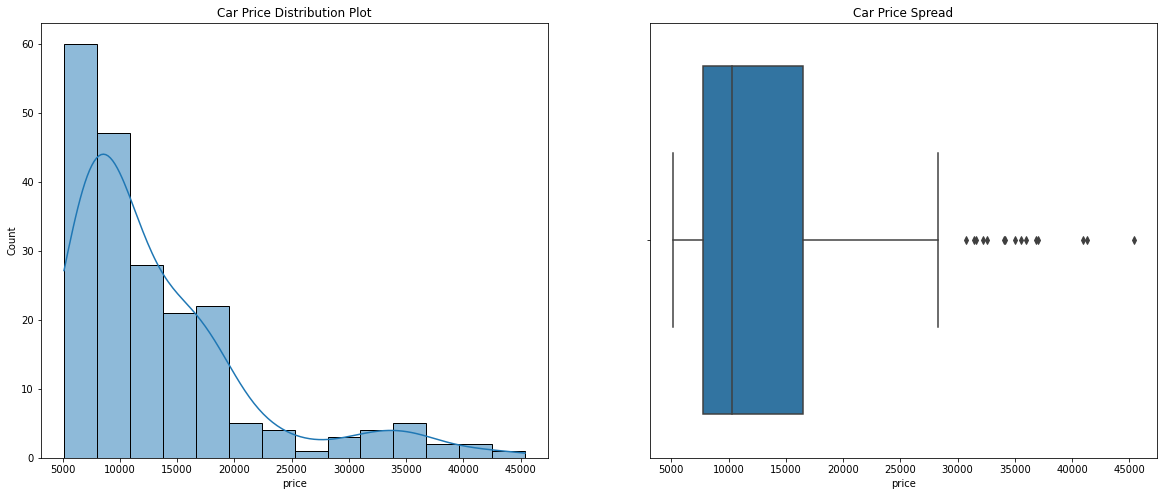

In [17]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(df['price'], kde=True)


plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(df['price'])
plt.show()

In [18]:
df.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1])['price']

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

In [19]:
#now visualization of categoirical data
cat = [i for i in df.columns if df[i].dtype =='object']
cat

['CompanyName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

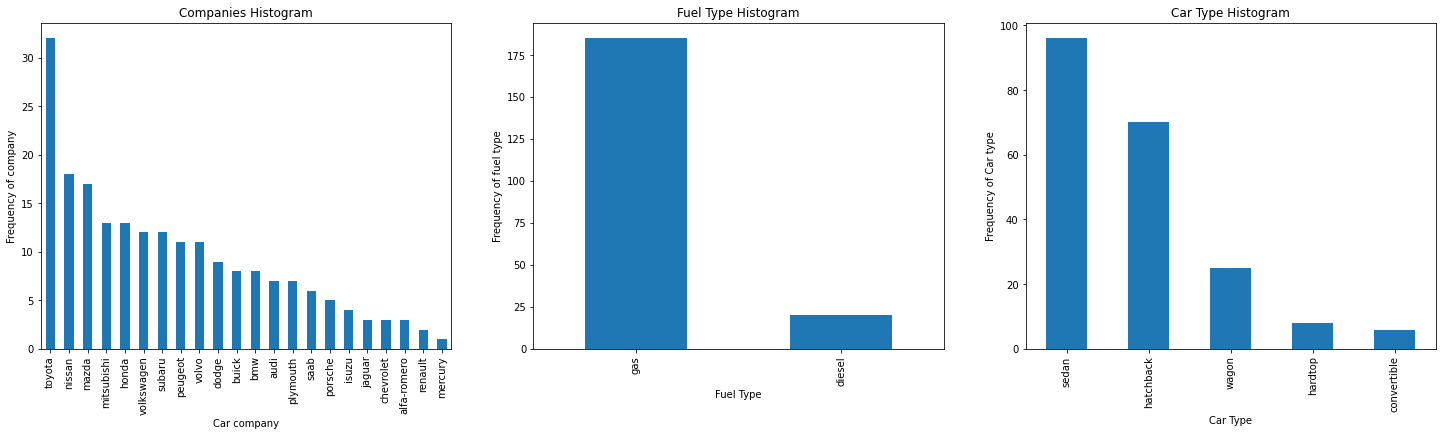

In [20]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.CompanyName.value_counts().plot(kind = 'bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

In [21]:
cat

['CompanyName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [23]:
df[cat].head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [24]:
df.head(2)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


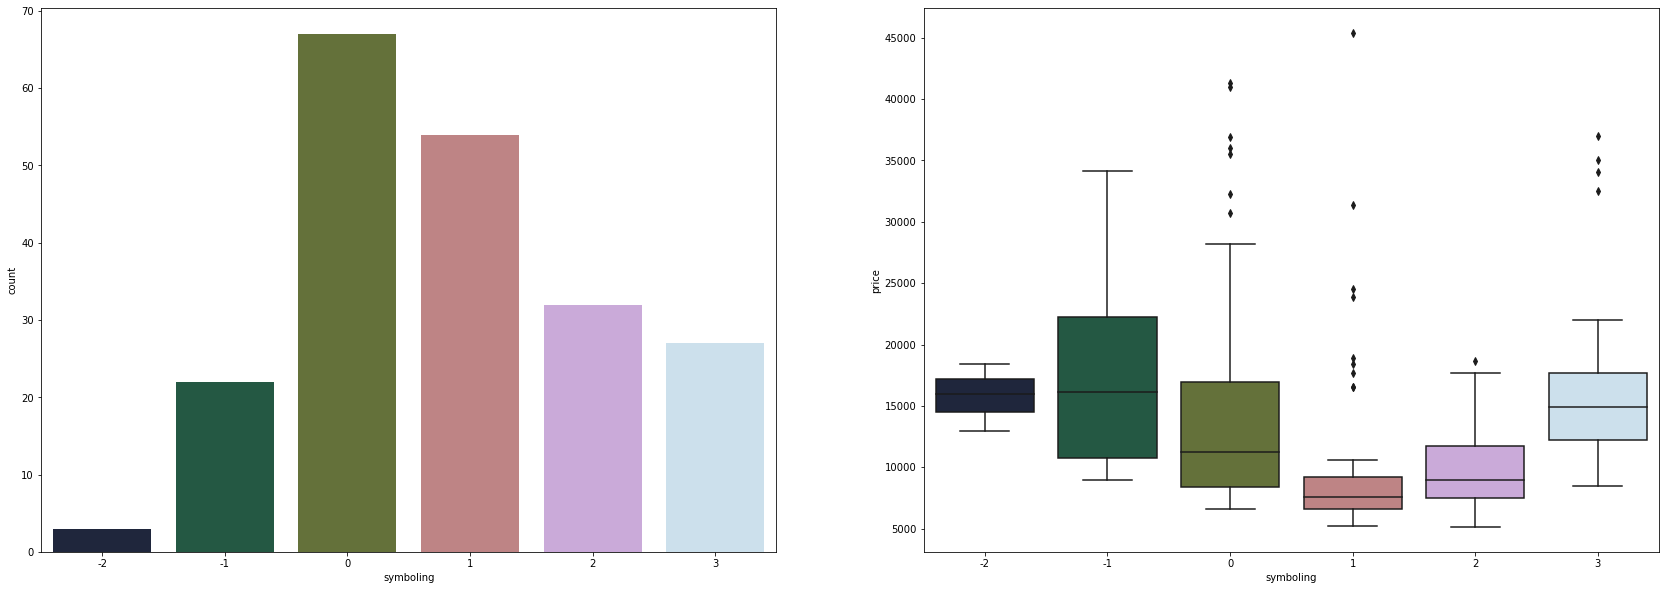

In [25]:
plt.figure(figsize=(29,10))
plt.subplot(1,2,1)
sns.countplot(x = df.symboling, palette=("cubehelix"))
plt.subplot(1,2,2)
sns.boxplot(x = df.symboling, y = df.price,palette=("cubehelix"))
plt.show()

In [26]:
df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [27]:
e = df.groupby('symboling')['price'].mean().sort_values(ascending=False)
e

symboling
-1    17330.681818
 3    17221.296296
-2    15781.666667
 0    14366.965179
 2    10109.281250
 1    10037.907407
Name: price, dtype: float64

In [28]:
df.CompanyName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CompanyName, dtype: int64

In [29]:
df.groupby('CompanyName')['price'].mean().sort_values(ascending=False)

CompanyName
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

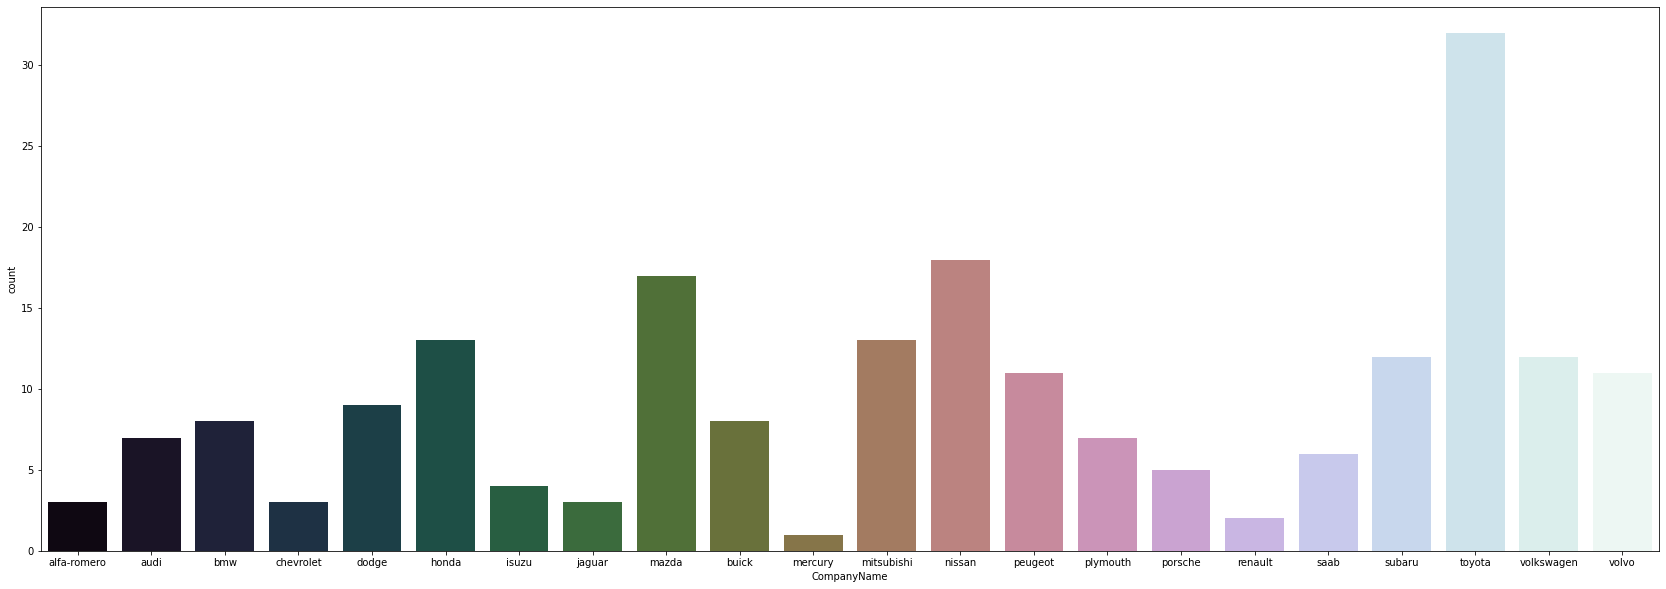

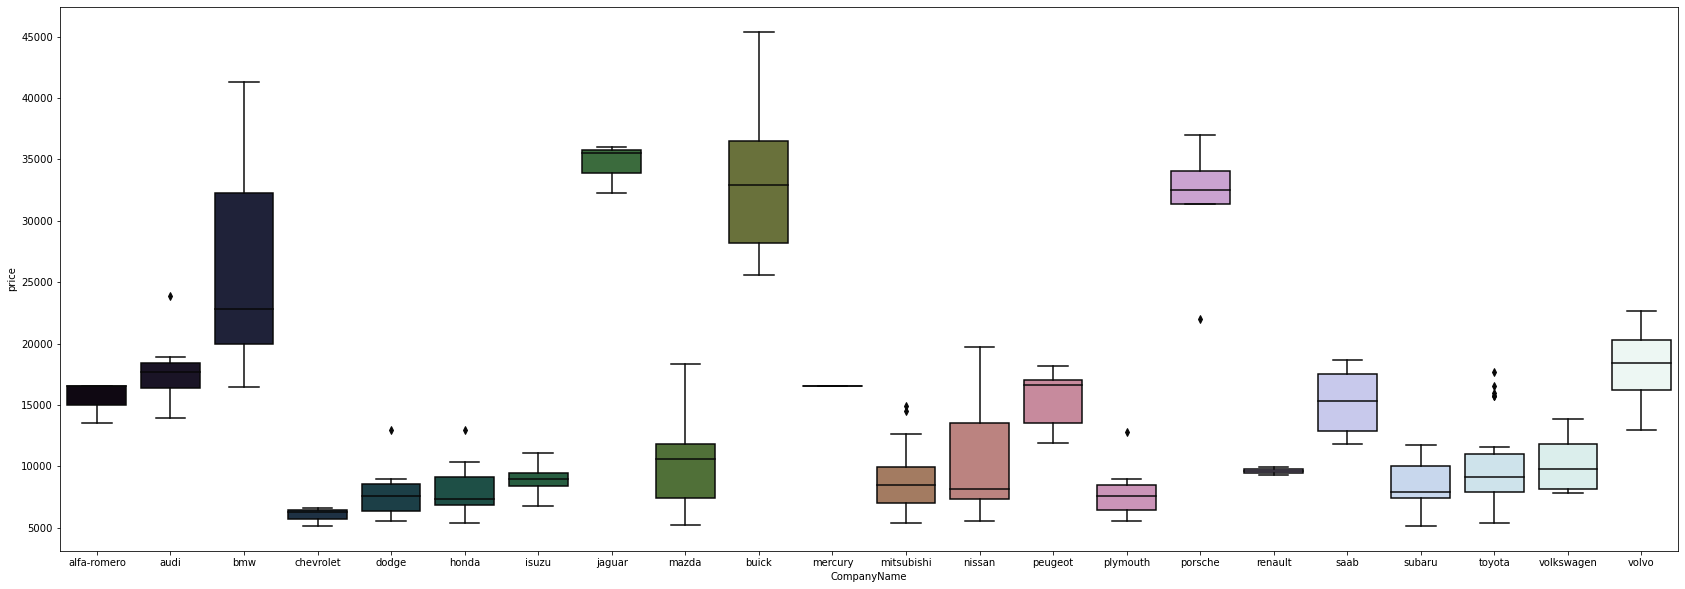

<AxesSubplot:xlabel='CompanyName'>

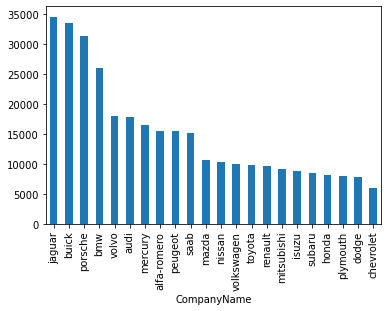

In [30]:
plt.figure(figsize=(29,10))

sns.countplot(x = df.CompanyName, palette=("cubehelix"))
plt.show()

plt.figure(figsize=(29,10))
sns.boxplot(x =df.CompanyName, y =df.price,palette=("cubehelix"))
plt.show()

df.groupby('CompanyName')['price'].mean().sort_values(ascending=False).plot(kind='bar')

In [31]:
cat

['CompanyName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [32]:
df.groupby('enginetype')['price'].mean().sort_values(ascending=False)

enginetype
dohcv    31400.500000
ohcv     25098.384615
dohc     18116.416667
l        14627.583333
ohcf     13738.600000
rotor    13020.000000
ohc      11574.048426
Name: price, dtype: float64

In [33]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

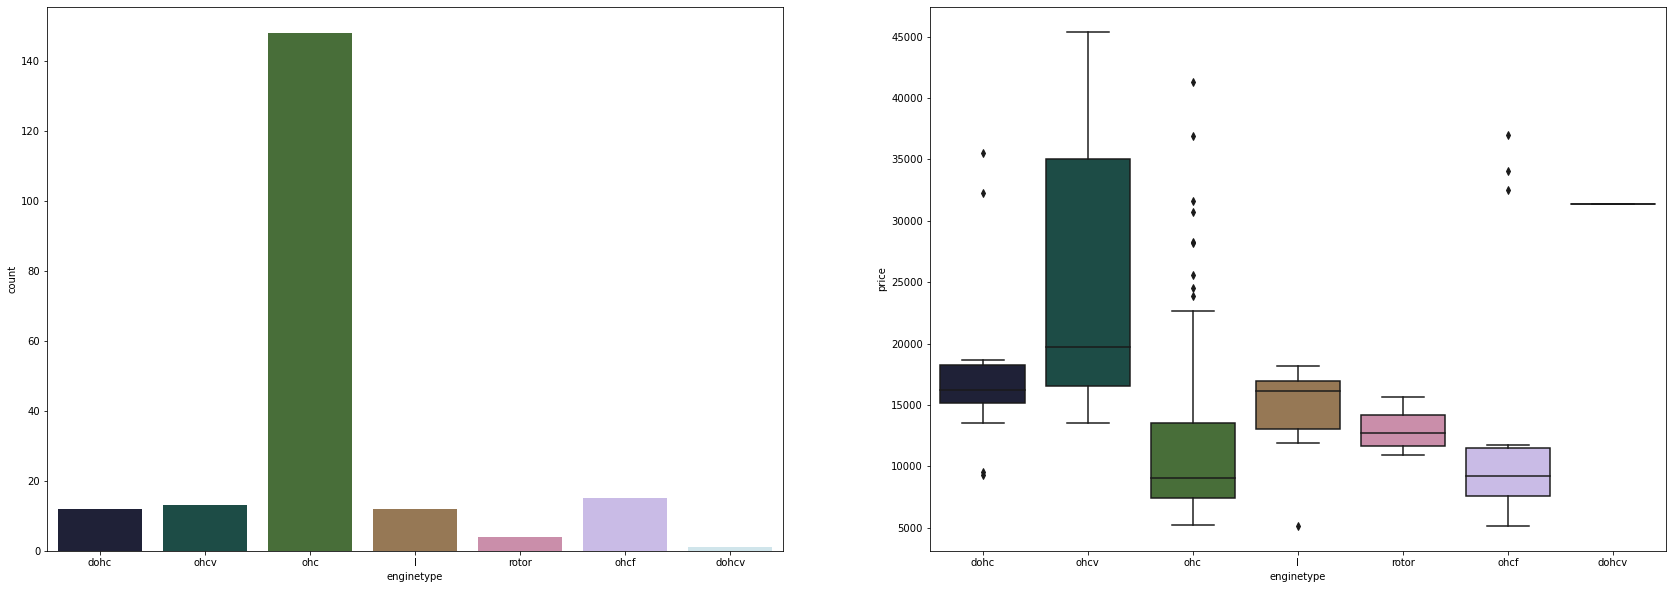

<AxesSubplot:xlabel='enginetype'>

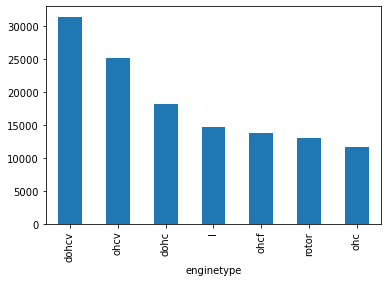

In [34]:
plt.figure(figsize=(29,10))
plt.subplot(1,2,1)
sns.countplot(x = df.enginetype, palette=("cubehelix"))
plt.subplot(1,2,2)
sns.boxplot(x = df.enginetype, y = df.price,palette=("cubehelix"))
plt.show()

df.groupby('enginetype')['price'].mean().sort_values(ascending=False).plot(kind='bar')

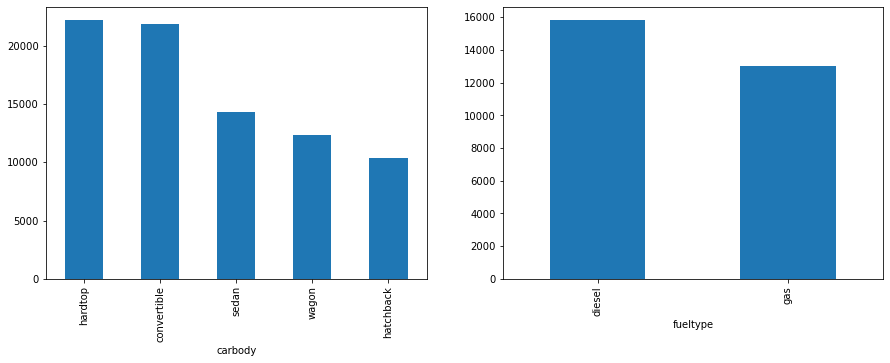

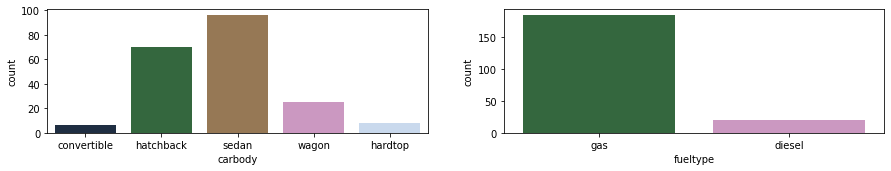

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df.groupby('carbody')['price'].mean().sort_values(ascending=False).plot(kind='bar')

plt.subplot(1,2,2)
df.groupby('fueltype')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.countplot(x = df.carbody, palette=("cubehelix"))

plt.subplot(2,2,2)
sns.countplot(x = df.fueltype, palette=("cubehelix"))
plt.show()

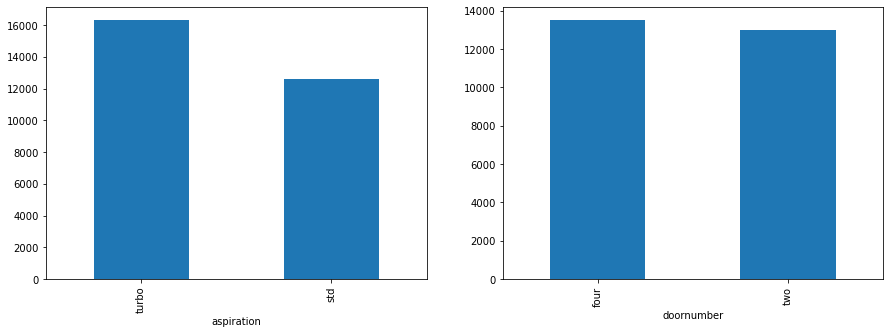

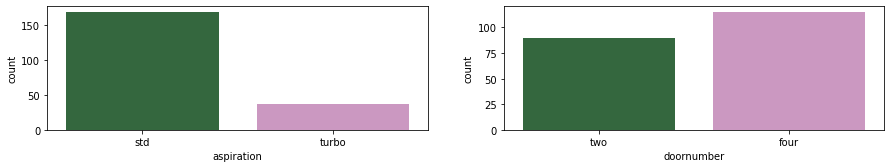

In [36]:
plt.figure(figsize =(15,5))
plt.subplot(1,2,1)
df.groupby('aspiration')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.subplot(1,2,2)
df.groupby('doornumber')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.countplot(x = df.aspiration, palette=("cubehelix"))

plt.subplot(2,2,2)
sns.countplot(x = df.doornumber, palette=("cubehelix"))
plt.show()

In [37]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(x =df[x],palette=("magma"))
    
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df[x], y=df.price, palette=("magma"))
   
   

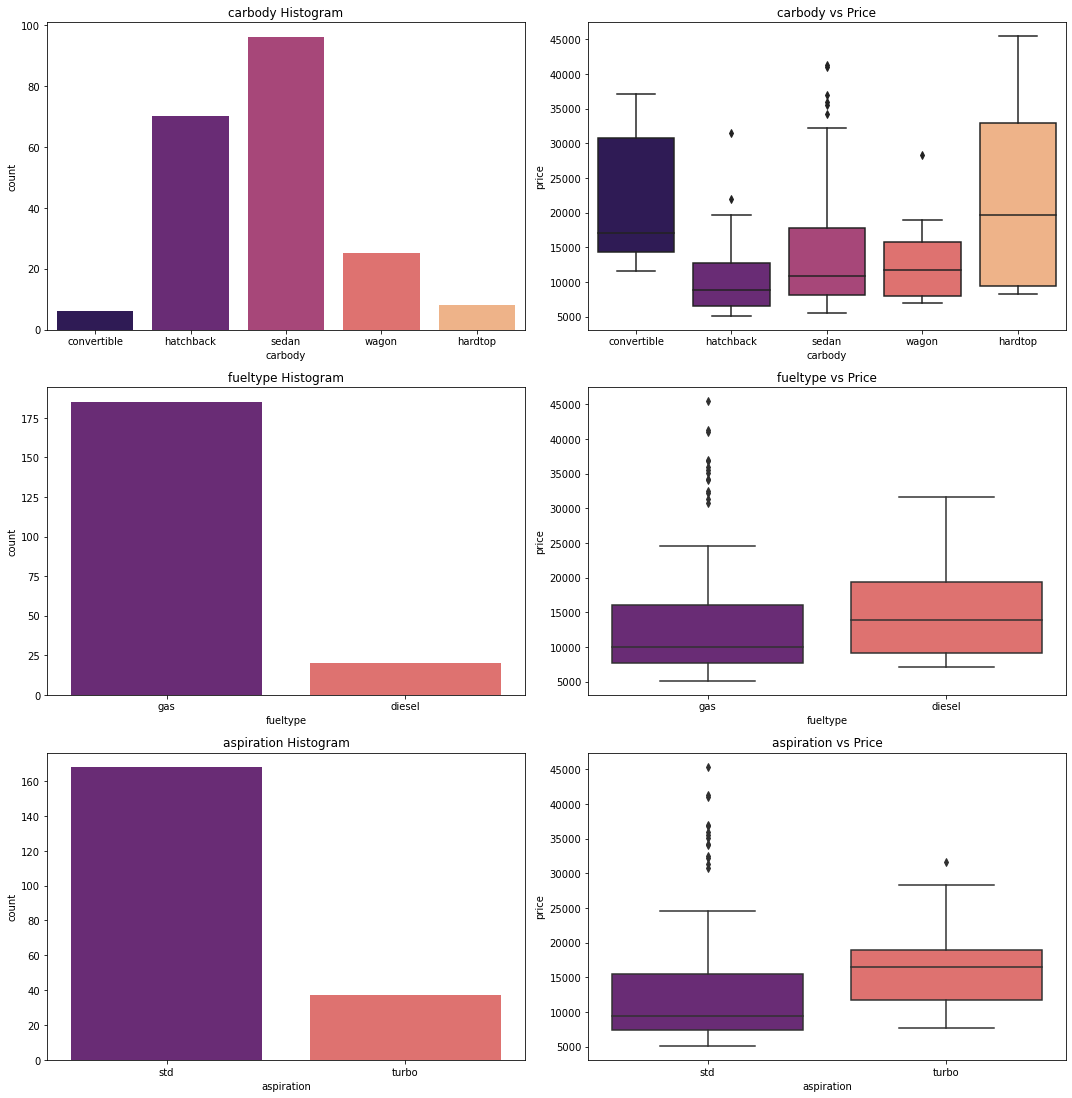

In [38]:
plt.figure(figsize=(15,20))
plot_count('carbody',1)
plot_count('fueltype',3)
plot_count('aspiration',5)
#plot_count('doornumber',5)
plt.tight_layout()

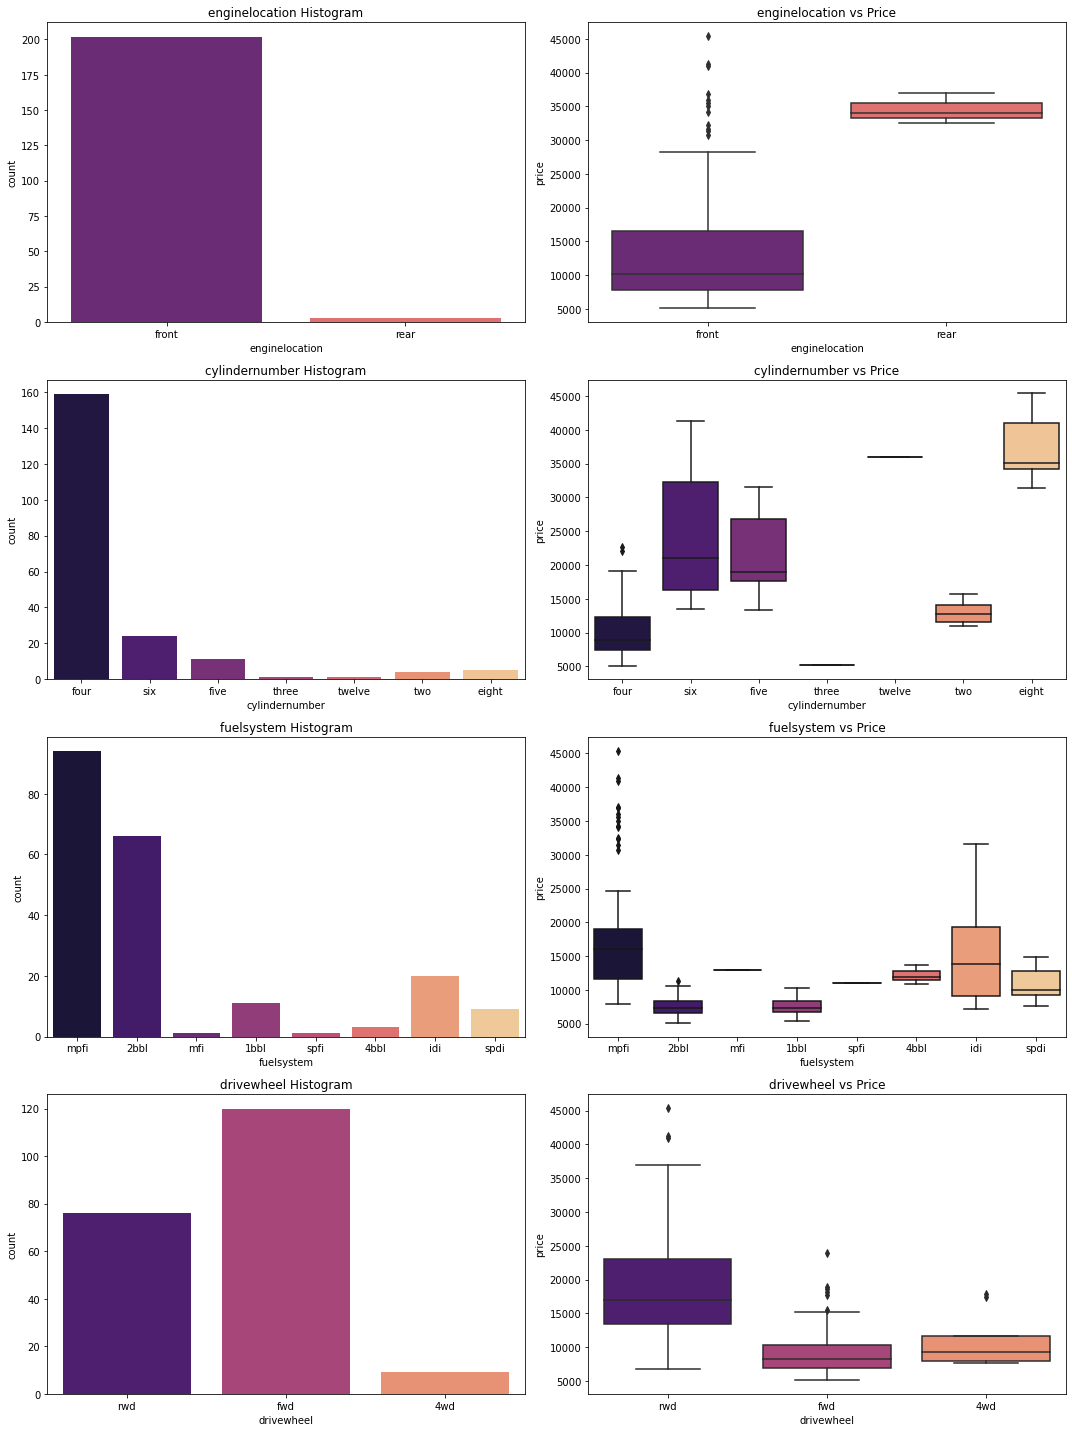

In [39]:

plt.figure(figsize=(15,20))
plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)
plt.tight_layout()

In [40]:
#numerical data

In [42]:
num = [i for i in df.columns if df[i].dtype!='object']

In [43]:
num

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [44]:
#sns.pairplot(df[num])

In [45]:
def joint_plot(a,b):
    sns.pairplot(x=[a,b],y='price',data= df, kind = 'hex',size=4, aspect=1,)
    plt.show()

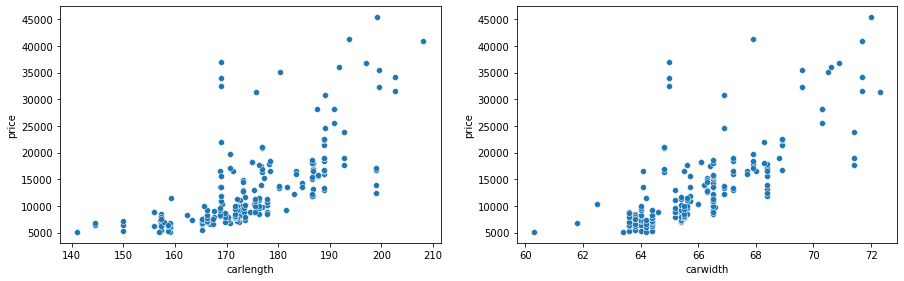

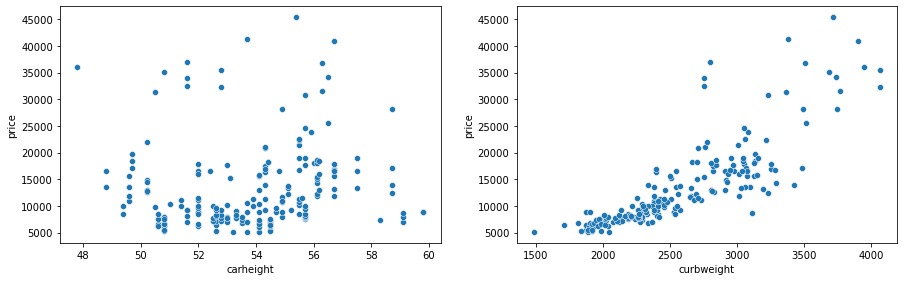

In [46]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.scatterplot(x='carlength',y='price',data= df)
plt.subplot(4,2,2)
sns.scatterplot(x='carwidth',y='price',data= df)
plt.show()
plt.figure(figsize=(15,20))
plt.subplot(4,2,3)
sns.scatterplot(x='carheight',y='price',data= df)
plt.subplot(4,2,4)
sns.scatterplot(x='curbweight',y='price',data= df)
plt.show()

In [47]:
def pp(a,b,c):
    sns.pairplot(df,x_vars=[a,b,c], y_vars = 'price', height=4,aspect=1,)
    plt.show()

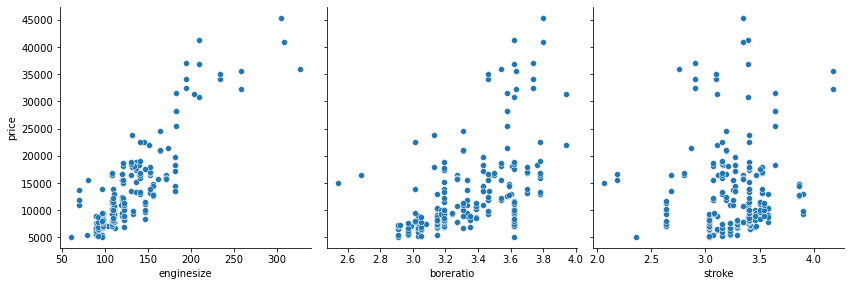

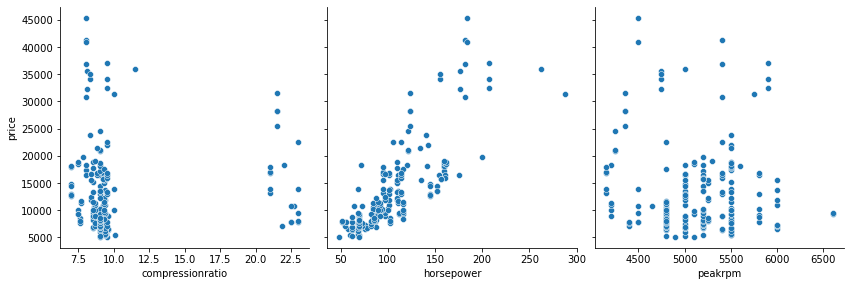

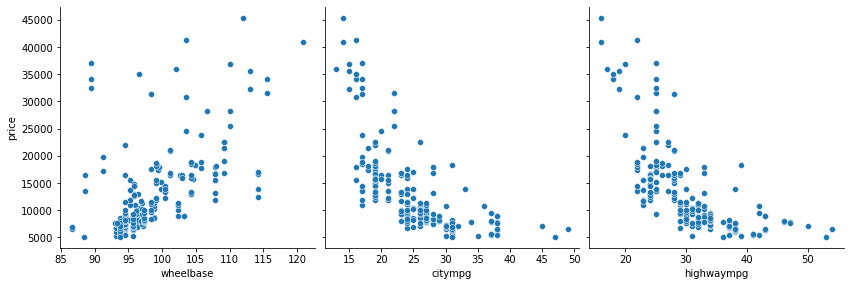

In [48]:
pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

In [49]:
df.head(2)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [50]:
df.price[:50]

0     13495.000
1     16500.000
2     16500.000
3     13950.000
4     17450.000
5     15250.000
6     17710.000
7     18920.000
8     23875.000
9     17859.167
10    16430.000
11    16925.000
12    20970.000
13    21105.000
14    24565.000
15    30760.000
16    41315.000
17    36880.000
18     5151.000
19     6295.000
20     6575.000
21     5572.000
22     6377.000
23     7957.000
24     6229.000
25     6692.000
26     7609.000
27     8558.000
28     8921.000
29    12964.000
30     6479.000
31     6855.000
32     5399.000
33     6529.000
34     7129.000
35     7295.000
36     7295.000
37     7895.000
38     9095.000
39     8845.000
40    10295.000
41    12945.000
42    10345.000
43     6785.000
44     8916.500
45     8916.500
46    11048.000
47    32250.000
48    35550.000
49    36000.000
Name: price, dtype: float64

In [51]:
#make car price int from float
df['price']=df['price'].astype('int') 

In [52]:
df.price[:50]

0     13495
1     16500
2     16500
3     13950
4     17450
5     15250
6     17710
7     18920
8     23875
9     17859
10    16430
11    16925
12    20970
13    21105
14    24565
15    30760
16    41315
17    36880
18     5151
19     6295
20     6575
21     5572
22     6377
23     7957
24     6229
25     6692
26     7609
27     8558
28     8921
29    12964
30     6479
31     6855
32     5399
33     6529
34     7129
35     7295
36     7295
37     7895
38     9095
39     8845
40    10295
41    12945
42    10345
43     6785
44     8916
45     8916
46    11048
47    32250
48    35550
49    36000
Name: price, dtype: int32

In [53]:
df['fueleconomy'] = (0.55*df['citympg'])+(0.45*df['highwaympg'])

In [54]:
25/55   #mean of both----25,30 calculate the proportion

0.45454545454545453

In [55]:
30/55

0.5454545454545454

In [56]:
df.citympg.mean()

25.21951219512195

In [57]:
df.highwaympg.mean()

30.75121951219512

In [58]:
df.head(2)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.7
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.7


In [59]:
#Binning(grouping ) the Car Companies based on avg prices of each Company.
af = df.copy()

In [60]:
af.groupby('CompanyName')['price'].mean().sort_values(ascending =False)

CompanyName
jaguar         34600.000000
buick          33647.000000
porsche        31400.400000
bmw            26118.750000
volvo          18063.181818
audi           17859.142857
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.250000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [61]:
print(af.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.702439
std       7988.848977
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


In [62]:
#The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)
0,10000,20000,40000

(0, 10000, 20000, 40000)

In [63]:
af['cars_range']= pd.cut(af['price_y'], bins =[0,10000,20000,40000],labels= [['Budget','Medium','Highend']])

KeyError: 'price_y'

In [65]:
d = af.groupby('CompanyName')['price'].mean()
d

CompanyName
alfa-romero    15498.333333
audi           17859.142857
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.250000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.400000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [66]:
d.reset_index()

,CompanyName,price
0,alfa-romero,15498.333333
1,audi,17859.142857
2,bmw,26118.750000
3,buick,33647.000000
4,chevrolet,6007.000000
5,dodge,7875.444444
6,honda,8184.692308
7,isuzu,8916.250000
8,jaguar,34600.000000
9,mazda,10652.882353


In [67]:
af = af.merge(d.reset_index(), how='left', on='CompanyName')
af

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,fueleconomy,price_y
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,15498.333333
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,15498.333333
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,15498.333333
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,17859.142857
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,17859.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845,25.25,18063.181818
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045,21.70,18063.181818
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485,20.25,18063.181818
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470,26.45,18063.181818


In [68]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
af['carsrange'] = pd.cut(af['price_y'],bins,labels=cars_bin)


In [69]:
af.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,fueleconomy,price_y,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495,23.70,15498.333333,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500,23.70,15498.333333,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500,22.15,15498.333333,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950,26.70,17859.142857,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450,19.80,17859.142857,Medium


In [70]:
df['carsrange']=pd.cut(af['price_y'],bins,labels=cars_bin)

In [71]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [73]:
#now feature selection


In [74]:
cr = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'fueleconomy', 'carlength','carwidth', 'carsrange']]
cr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [72]:
sns.scatterplot(x='fueleconomy', y='price', data = af, hue=af['drivewheel'])

ValueError: Could not interpret value `price` for parameter `y`

In [75]:
tr = cr.copy()

In [76]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

tr = dummies('fueltype',tr)
tr = dummies('aspiration',tr)
tr = dummies('carbody',tr)
tr = dummies('drivewheel',tr)
tr = dummies('enginetype',tr)
tr = dummies('cylindernumber',tr)
tr = dummies('carsrange',tr)

In [77]:
tr

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,109.1,2952,141,3.78,114,25.25,188.8,68.9,1,...,0,0,0,1,0,0,0,0,1,0
201,19045,109.1,3049,141,3.78,160,21.70,188.8,68.8,1,...,0,0,0,1,0,0,0,0,1,0
202,21485,109.1,3012,173,3.58,134,20.25,188.8,68.9,1,...,1,0,0,0,1,0,0,0,1,0
203,22470,109.1,3217,145,3.01,106,26.45,188.8,68.9,0,...,0,0,0,0,1,0,0,0,1,0


In [78]:
er = tr.copy()

In [85]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(er, train_size = 0.7, test_size = 0.3, random_state = 100)

In [88]:
df_train.to_csv('car_train_df.csv')

In [89]:
df_test.to_csv('car_test_df.csv')

In [90]:
df_train

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,7609,93.7,2191,98,2.97,68,34.15,167.3,63.8,1,...,0,0,0,1,0,0,0,0,0,0
125,22018,94.5,2778,151,3.94,143,22.60,168.9,68.3,1,...,0,0,0,1,0,0,0,0,0,1
166,9538,94.5,2300,98,3.24,112,27.35,168.7,64.0,1,...,0,0,0,1,0,0,0,0,0,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
199,18950,104.3,3157,130,3.62,162,19.25,188.8,67.2,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,9279,96.3,2403,110,3.17,116,26.15,172.4,65.4,1,...,0,0,0,1,0,0,0,0,0,0
103,13499,100.4,3060,181,3.43,152,21.70,184.6,66.5,1,...,1,0,0,0,1,0,0,0,1,0
67,25552,110.0,3515,183,3.58,123,23.35,190.9,70.3,0,...,0,0,1,0,0,0,0,0,0,1
24,6229,93.7,1967,90,2.97,68,34.15,157.3,63.8,1,...,0,0,0,1,0,0,0,0,0,0


In [91]:
df_test

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
160,7738,95.7,2094,98,3.19,70,42.05,166.3,64.4,1,...,0,0,0,1,0,0,0,0,0,0
186,8495,97.3,2275,109,3.19,85,30.15,171.7,65.5,1,...,0,0,0,1,0,0,0,0,1,0
59,8845,98.8,2385,122,3.39,84,28.70,177.8,66.5,1,...,0,0,0,1,0,0,0,0,1,0
165,9298,94.5,2265,98,3.24,112,27.35,168.7,64.0,1,...,0,0,0,1,0,0,0,0,0,0
140,7603,93.3,2240,108,3.62,73,28.25,157.3,63.8,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,8921,103.3,2535,122,3.34,88,26.70,174.6,64.6,1,...,0,0,0,1,0,0,0,0,0,0
29,12964,95.9,2811,156,3.60,145,21.25,173.2,66.3,1,...,0,0,0,1,0,0,0,0,0,0
182,7775,97.3,2261,97,3.01,52,41.05,171.7,65.5,0,...,0,0,0,1,0,0,0,0,1,0
40,10295,96.5,2372,110,3.15,86,29.70,175.4,62.5,1,...,0,0,0,1,0,0,0,0,0,0


In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [84]:
df_train

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.114954,0.334483,0.354926,0.184906,0.388889,0.283333,0.311385,0.508943,0.425000,1,...,0,0,0,1,0,0,0,0,0,0
103,0.231539,0.475862,0.609775,0.452830,0.595238,0.433333,0.189300,0.707317,0.516667,1,...,1,0,0,0,1,0,0,0,1,0
67,0.564522,0.806897,0.786268,0.460377,0.714286,0.312500,0.234568,0.809756,0.833333,0,...,0,0,1,0,0,0,0,0,0,1
24,0.030693,0.244828,0.185803,0.109434,0.230159,0.083333,0.530864,0.263415,0.291667,1,...,0,0,0,1,0,0,0,0,0,0


In [83]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
price,143.0,0.219309,0.215682,0.0,0.067298,0.140343,0.313479,1.0
wheelbase,143.0,0.411141,0.205581,0.0,0.272414,0.341379,0.503448,1.0
curbweight,143.0,0.407878,0.211269,0.0,0.245539,0.355702,0.559542,1.0
enginesize,143.0,0.241351,0.154619,0.0,0.135849,0.184906,0.301887,1.0
boreratio,143.0,0.497946,0.207140,0.0,0.305556,0.500000,0.682540,1.0
horsepower,143.0,0.227302,0.165511,0.0,0.091667,0.191667,0.283333,1.0
fueleconomy,143.0,0.358265,0.185980,0.0,0.198903,0.344307,0.512346,1.0
carlength,143.0,0.525476,0.204848,0.0,0.399187,0.502439,0.669919,1.0
carwidth,143.0,0.461655,0.184517,0.0,0.304167,0.425000,0.550000,1.0
gas,143.0,0.909091,0.288490,0.0,1.000000,1.000000,1.000000,1.0


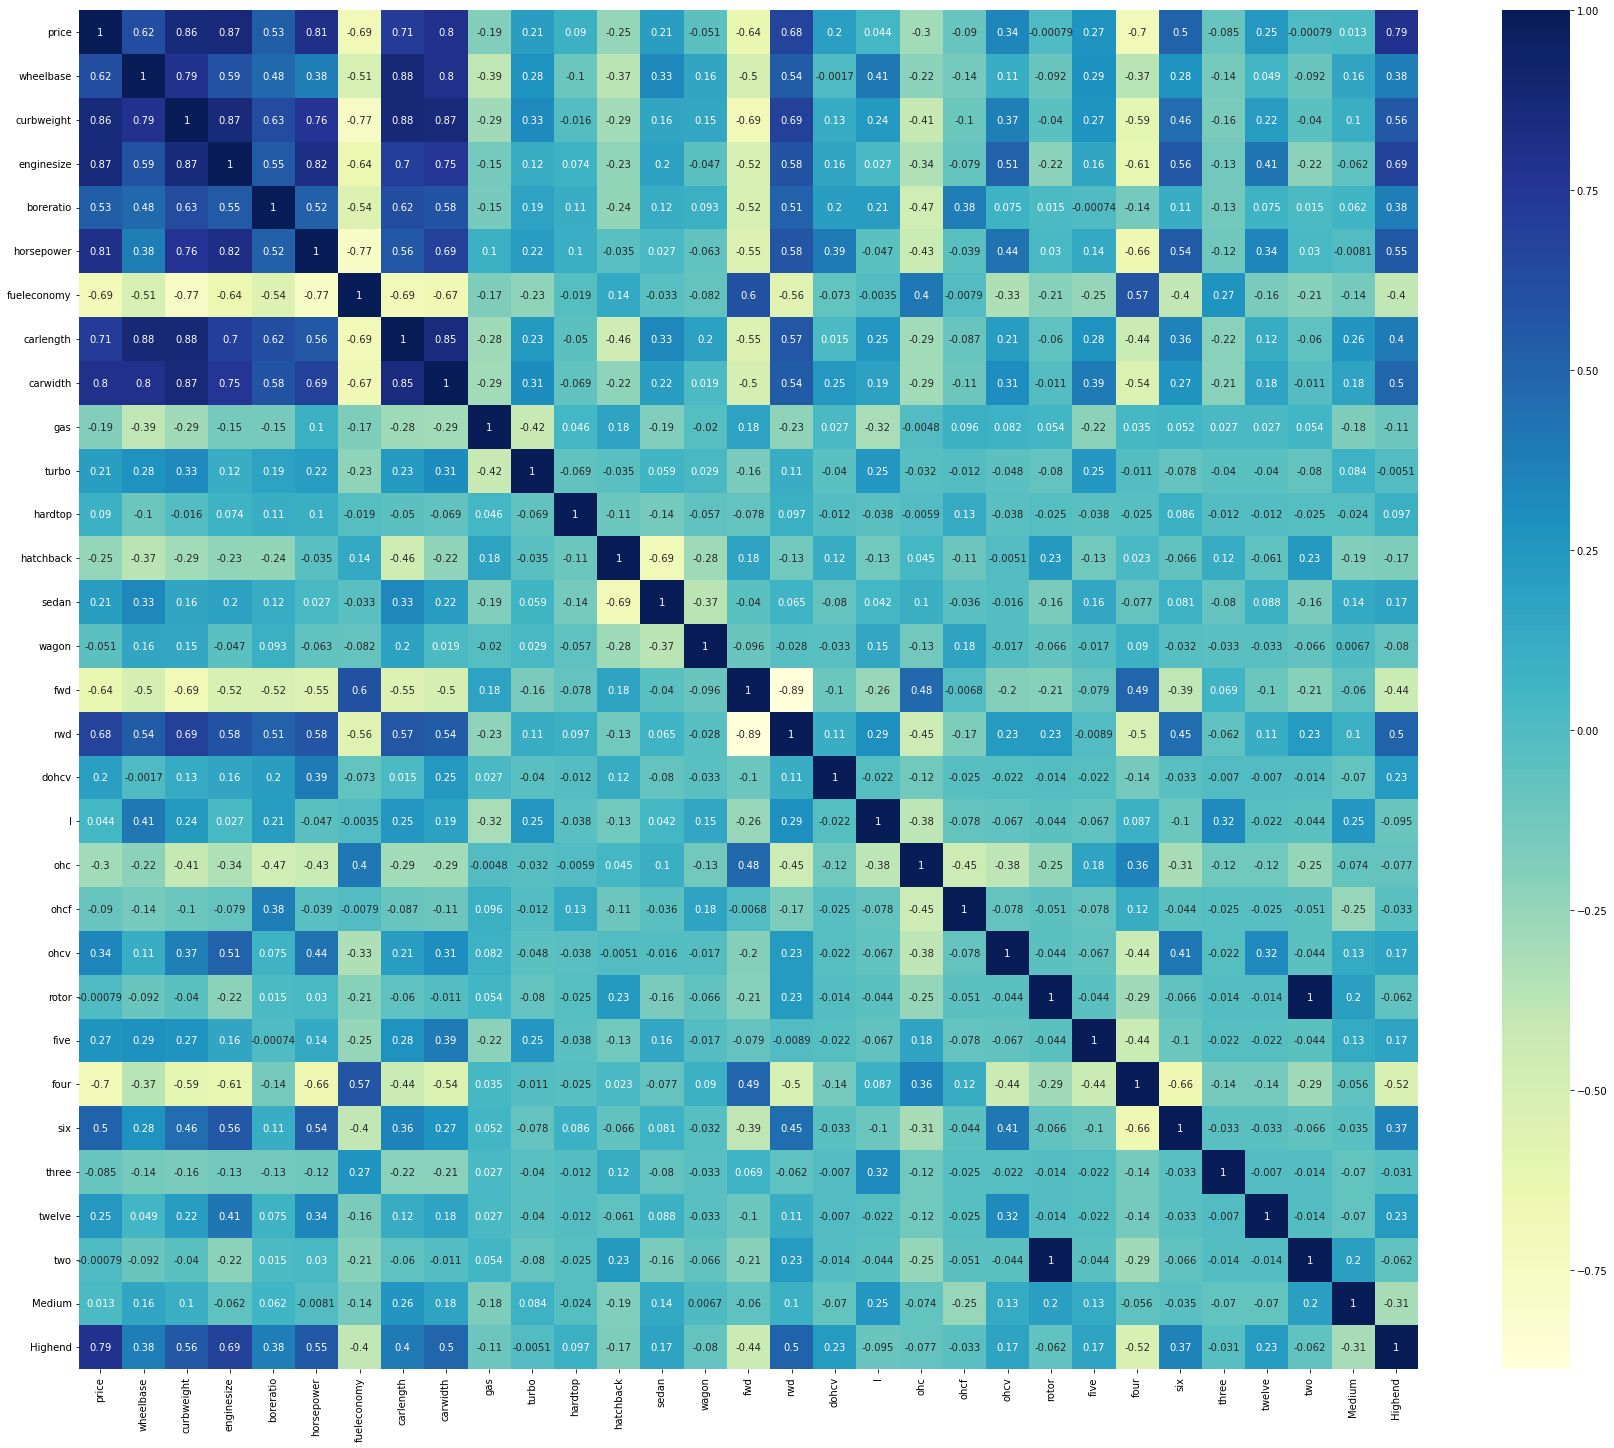

In [142]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [144]:
x_train = df_train.pop('price')

KeyError: 'price'

In [148]:
X_train = df_train

In [147]:
x_train = y_train

In [149]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [150]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [152]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [153]:
X_train.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'fueleconomy', 'carlength', 'carwidth', 'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two', 'Medium', 'Highend'],
      dtype='object')

In [154]:
rfe.support_

array([False,  True, False, False,  True,  True, False,  True, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True])

In [155]:
rfe.ranking_

array([ 3,  1, 13, 10,  1,  1, 11,  1, 17, 18,  2,  1,  1,  1, 16, 15,  1,
       19,  7,  8,  9, 21,  6,  4,  5, 14,  1, 20, 12,  1])

In [156]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

In [157]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [158]:
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


In [ ]:
X_train_new = build_model(X_train_rfe,y_train)

In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [173]:
X = sm.add_constant(X_train_rfe) 

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [174]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [175]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.469
Model:                            OLS   Adj. R-squared (uncentered):              1.504
Method:                 Least Squares   F-statistic:                             -41.69
Date:                Tue, 24 May 2022   Prob (F-statistic):                        1.00
Time:                        10:07:38   Log-Likelihood:                         -1295.8
No. Observations:                 143   AIC:                                      2612.
Df Residuals:                     133   BIC:                                      2641.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
curbweight   9878.8319   2476.371      3.989      0.000    4980.666    1.48e+04
horsepower   1.782e+04   2284.183      7.801      0.000    1.33e+04    2.23e+04
fueleconomy  5016.5285   1166.289      4.301      0.000    2709.655    7323.402
carwidth     9945.1085   2195.413      4.530      0.000    5602.667    1.43e+04
hatchback   -2914.5920    812.397     -3.588      0.000   -4521.483   -1307.701
sedan       -2128.5672    816.278     -2.608      0.010   -3743.134    -514.001
wagon       -3106.9266    905.530     -3.431      0.001   -4898.029   -1315.824
dohcv       -1.088e+04   2648.526     -4.107      0.000   -1.61e+04   -5637.699
twelve      -4977.0308   2367.087     -2.103      0.037   -9659.037    -295.024
Highend      9247.0485    717.241     12.893      0.000    7828.373    1.07e+04
==============================================================================
Omnibus:                       39.119   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.972
Skew:                           1.060   Prob(JB):                     9.74e-24
Kurtosis:                       6.645   Cond. No.                         20.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
y_train

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,7609,93.7,2191,98,2.97,68,34.15,167.3,63.8,1,...,0,0,0,1,0,0,0,0,0,0
125,22018,94.5,2778,151,3.94,143,22.60,168.9,68.3,1,...,0,0,0,1,0,0,0,0,0,1
166,9538,94.5,2300,98,3.24,112,27.35,168.7,64.0,1,...,0,0,0,1,0,0,0,0,0,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
199,18950,104.3,3157,130,3.62,162,19.25,188.8,67.2,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,9279,96.3,2403,110,3.17,116,26.15,172.4,65.4,1,...,0,0,0,1,0,0,0,0,0,0
103,13499,100.4,3060,181,3.43,152,21.70,184.6,66.5,1,...,1,0,0,0,1,0,0,0,1,0
67,25552,110.0,3515,183,3.58,123,23.35,190.9,70.3,0,...,0,0,1,0,0,0,0,0,0,1
24,6229,93.7,1967,90,2.97,68,34.15,157.3,63.8,1,...,0,0,0,1,0,0,0,0,0,0


In [169]:
X_train

,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,...,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,...,0,0,0,1,0,0,0,0,0,1
166,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,...,0,0,0,1,0,0,0,0,1,0
199,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.334483,0.354926,0.184906,0.388889,0.283333,0.311385,0.508943,0.425000,1,1,...,0,0,0,1,0,0,0,0,0,0
103,0.475862,0.609775,0.452830,0.595238,0.433333,0.189300,0.707317,0.516667,1,0,...,1,0,0,0,1,0,0,0,1,0
67,0.806897,0.786268,0.460377,0.714286,0.312500,0.234568,0.809756,0.833333,0,1,...,0,0,1,0,0,0,0,0,0,1
24,0.244828,0.185803,0.109434,0.230159,0.083333,0.530864,0.263415,0.291667,1,0,...,0,0,0,1,0,0,0,0,0,0


In [171]:
y_train = x_train.pop('price')

In [172]:
y_train

122     7609
125    22018
166     9538
1      16500
199    18950
       ...  
87      9279
103    13499
67     25552
24      6229
8      23875
Name: price, Length: 143, dtype: int32

In [ ]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [176]:
vif = pd.DataFrame()

In [177]:
vif

""


In [179]:
vif['Features'] = X_train_rfe.columns

In [180]:
vif

,Features
0,curbweight
1,horsepower
2,fueleconomy
3,carwidth
4,hatchback
5,sedan
6,wagon
7,dohcv
8,twelve
9,Highend


In [186]:
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]

In [181]:
X_train_rfe.values

array([[0.27269201, 0.08333333, 0.5308642 , ..., 0.        , 0.        ,
        0.        ],
       [0.5003879 , 0.39583333, 0.21399177, ..., 0.        , 0.        ,
        1.        ],
       [0.31497285, 0.26666667, 0.34430727, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.78626843, 0.3125    , 0.2345679 , ..., 0.        , 0.        ,
        1.        ],
       [0.18580295, 0.08333333, 0.5308642 , ..., 0.        , 0.        ,
        0.        ],
       [0.61986036, 0.38333333, 0.09739369, ..., 0.        , 0.        ,
        0.        ]])

In [187]:
vif

,Features,VIF
0,curbweight,39.496403
1,horsepower,12.579231
2,fueleconomy,6.765311
3,carwidth,36.383204
4,hatchback,6.913299
5,sedan,9.685840
6,wagon,3.330514
7,dohcv,1.499548
8,twelve,1.197790
9,Highend,1.869526


# modeling

In [189]:
tr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [190]:
#train test split
from sklearn.model_selection import train_test_split

In [192]:
np.random.seed(0)
df_train, df_test = train_test_split(tr, test_size=0.3, random_state= 100)

In [193]:
#feature scaling  minmax scaling

from sklearn.preprocessing import MinMaxScaler

In [197]:
scaler = MinMaxScaler()

In [199]:
#scaling of numerical data
num = ['price','wheelbase','curbweight','enginesize','boreratio','horsepower','fueleconomy','carlength','carwidth']
df_train[num] = scaler.fit_transform(df_train[num])

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [200]:
df_train[num] 

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000
...,...,...,...,...,...,...,...,...,...
87,0.114954,0.334483,0.354926,0.184906,0.388889,0.283333,0.311385,0.508943,0.425000
103,0.231539,0.475862,0.609775,0.452830,0.595238,0.433333,0.189300,0.707317,0.516667
67,0.564522,0.806897,0.786268,0.460377,0.714286,0.312500,0.234568,0.809756,0.833333
24,0.030693,0.244828,0.185803,0.109434,0.230159,0.083333,0.530864,0.263415,0.291667


In [195]:
df_train

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,7609,93.7,2191,98,2.97,68,34.15,167.3,63.8,1,...,0,0,0,1,0,0,0,0,0,0
125,22018,94.5,2778,151,3.94,143,22.60,168.9,68.3,1,...,0,0,0,1,0,0,0,0,0,1
166,9538,94.5,2300,98,3.24,112,27.35,168.7,64.0,1,...,0,0,0,1,0,0,0,0,0,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
199,18950,104.3,3157,130,3.62,162,19.25,188.8,67.2,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,9279,96.3,2403,110,3.17,116,26.15,172.4,65.4,1,...,0,0,0,1,0,0,0,0,0,0
103,13499,100.4,3060,181,3.43,152,21.70,184.6,66.5,1,...,1,0,0,0,1,0,0,0,1,0
67,25552,110.0,3515,183,3.58,123,23.35,190.9,70.3,0,...,0,0,1,0,0,0,0,0,0,1
24,6229,93.7,1967,90,2.97,68,34.15,157.3,63.8,1,...,0,0,0,1,0,0,0,0,0,0


In [196]:
num = ['price','wheelbase','curbweight','enginesize','boreratio','horsepower','fueleconomy','carlength','carwidth']

In [201]:
df_train

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.114954,0.334483,0.354926,0.184906,0.388889,0.283333,0.311385,0.508943,0.425000,1,...,0,0,0,1,0,0,0,0,0,0
103,0.231539,0.475862,0.609775,0.452830,0.595238,0.433333,0.189300,0.707317,0.516667,1,...,1,0,0,0,1,0,0,0,1,0
67,0.564522,0.806897,0.786268,0.460377,0.714286,0.312500,0.234568,0.809756,0.833333,0,...,0,0,1,0,0,0,0,0,0,1
24,0.030693,0.244828,0.185803,0.109434,0.230159,0.083333,0.530864,0.263415,0.291667,1,...,0,0,0,1,0,0,0,0,0,0


In [204]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
price,143.0,0.219309,0.215682,0.0,0.067298,0.140343,0.313479,1.0
wheelbase,143.0,0.411141,0.205581,0.0,0.272414,0.341379,0.503448,1.0
curbweight,143.0,0.407878,0.211269,0.0,0.245539,0.355702,0.559542,1.0
enginesize,143.0,0.241351,0.154619,0.0,0.135849,0.184906,0.301887,1.0
boreratio,143.0,0.497946,0.207140,0.0,0.305556,0.500000,0.682540,1.0
horsepower,143.0,0.227302,0.165511,0.0,0.091667,0.191667,0.283333,1.0
fueleconomy,143.0,0.358265,0.185980,0.0,0.198903,0.344307,0.512346,1.0
carlength,143.0,0.525476,0.204848,0.0,0.399187,0.502439,0.669919,1.0
carwidth,143.0,0.461655,0.184517,0.0,0.304167,0.425000,0.550000,1.0
gas,143.0,0.909091,0.288490,0.0,1.000000,1.000000,1.000000,1.0


In [206]:
df_train.head(1)

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0


In [207]:
df_test.head(1)

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
160,7738,95.7,2094,98,3.19,70,42.05,166.3,64.4,1,...,0,0,0,1,0,0,0,0,0,0


In [210]:
#Dividing data into X and y variable
y_train = df_train.pop('price')

In [212]:
X_train = df_train

In [208]:
#EDA--done
#feature selection---done
#feature scaling---done
#modeling

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE   #Recursive Feature Elimination 

In [214]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [215]:
rfe = RFE(lm, 10)   #RFE(method, no of features selected)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [216]:
rfe = rfe.fit(X_train, y_train)

In [218]:
rfe.support_  #selected columns

array([False,  True, False, False,  True,  True, False,  True, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True])

In [220]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

In [223]:
X_train_nw = X_train[X_train.columns[rfe.support_]]
X_train_nw.head(2)

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1


In [226]:
X = sm.add_constant(X_train_nw)
X

,const,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,1.0,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,1.0,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,1.0,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,1.0,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,1.0,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
87,1.0,0.354926,0.283333,0.311385,0.425000,0,1,0,0,0,0
103,1.0,0.609775,0.433333,0.189300,0.516667,0,1,0,0,0,0
67,1.0,0.786268,0.312500,0.234568,0.833333,0,1,0,0,0,1
24,1.0,0.185803,0.083333,0.530864,0.291667,1,0,0,0,0,0


In [234]:
ln = sm.OLS(y_train,X_train_nw).fit()
ln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              353.9
Date:                Tue, 24 May 2022   Prob (F-statistic):                    1.21e-90
Time:                        11:07:08   Log-Likelihood:                          203.17
No. Observations:                 143   AIC:                                     -386.3
Df Residuals:                     133   BIC:                                     -356.7
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
curbweight      0.2511      0.069      3.619      0.000       0.114       0.388
horsepower      0.3641      0.064      5.688      0.000       0.237       0.491
fueleconomy     0.0015      0.033      0.047      0.963      -0.063       0.066
carwidth        0.2328      0.062      3.784      0.000       0.111       0.354
hatchback      -0.1180      0.023     -5.186      0.000      -0.163      -0.073
sedan          -0.0939      0.023     -4.105      0.000      -0.139      -0.049
wagon          -0.1279      0.025     -5.040      0.000      -0.178      -0.078
dohcv          -0.2010      0.074     -2.708      0.008      -0.348      -0.054
twelve         -0.0822      0.066     -1.240      0.217      -0.213       0.049
Highend         0.2651      0.020     13.190      0.000       0.225       0.305
==============================================================================
Omnibus:                       46.637   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.411
Skew:                           1.188   Prob(JB):                     1.09e-34
Kurtosis:                       7.540   Cond. No.                         20.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
ln = sm.OLS(y_train,X).fit()
ln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.29e-70
Time:                        11:15:47   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      0.027      -0.178      -0.011
curbweight      0.2657      0.069      3.870      0.000       0.130       0.402
horsepower      0.4499      0.074      6.099      0.000       0.304       0.596
fueleconomy     0.0933      0.052      1.792      0.075      -0.010       0.196
carwidth        0.2609      0.062      4.216      0.000       0.138       0.383
hatchback      -0.0929      0.025     -3.707      0.000      -0.143      -0.043
sedan          -0.0704      0.025     -2.833      0.005      -0.120      -0.021
wagon          -0.0997      0.028     -3.565      0.001      -0.155      -0.044
dohcv          -0.2676      0.079     -3.391      0.001      -0.424      -0.112
twelve         -0.1192      0.067     -1.769      0.079      -0.253       0.014
Highend         0.2586      0.020     12.929      0.000       0.219       0.298
==============================================================================
Omnibus:                       43.093   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.648
Skew:                           1.128   Prob(JB):                     4.27e-29
Kurtosis:                       7.103   Cond. No.                         32.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
#above twelve have very high pvalue delet this column


In [242]:
X_train_nw1 = X_train_nw.drop('twelve', axis = 1)
X_train_nw1.head(1)

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0


In [243]:
#model2
X = sm.add_constant(X_train_nw1)
ln = sm.OLS(y_train, X).fit()
ln.summary()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 24 May 2022   Prob (F-statistic):           4.25e-71
Time:                        11:17:39   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      0.066      -0.158       0.005
curbweight      0.2756      0.069      3.995      0.000       0.139       0.412
horsepower      0.3997      0.069      5.824      0.000       0.264       0.535
fueleconomy     0.0736      0.051      1.435      0.154      -0.028       0.175
carwidth        0.2580      0.062      4.137      0.000       0.135       0.381
hatchback      -0.0951      0.025     -3.766      0.000      -0.145      -0.045
sedan          -0.0744      0.025     -2.983      0.003      -0.124      -0.025
wagon          -0.1050      0.028     -3.744      0.000      -0.160      -0.050
dohcv          -0.2319      0.077     -3.015      0.003      -0.384      -0.080
Highend         0.2565      0.020     12.743      0.000       0.217       0.296
==============================================================================
Omnibus:                       48.027   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.802
Skew:                           1.231   Prob(JB):                     1.99e-35
Kurtosis:                       7.556   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
#drop fuleeconomy has high pvalue
X_train_nw1 = X_train_nw1.drop('twelve', axis = 1)
X_train_nw1.head(1)

,curbweight,horsepower,carwidth,hatchback,sedan,wagon,dohcv,Highend
122,0.272692,0.083333,0.291667,0,1,0,0,0


In [250]:
X = sm.add_constant(X_train_nw1)
ln = sm.OLS(y_train, X).fit()
ln.summary()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Tue, 24 May 2022   Prob (F-statistic):           7.85e-72
Time:                        11:21:34   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.246      -0.082       0.021
curbweight     0.2593      0.068      3.796      0.000       0.124       0.394
horsepower     0.3469      0.058      5.964      0.000       0.232       0.462
carwidth       0.2488      0.062      3.995      0.000       0.126       0.372
hatchback     -0.0922      0.025     -3.650      0.000      -0.142      -0.042
sedan         -0.0711      0.025     -2.850      0.005      -0.120      -0.022
wagon         -0.1047      0.028     -3.721      0.000      -0.160      -0.049
dohcv         -0.1968      0.073     -2.689      0.008      -0.342      -0.052
Highend        0.2610      0.020     13.083      0.000       0.222       0.301
==============================================================================
Omnibus:                       48.637   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.444
Skew:                           1.250   Prob(JB):                     8.77e-36
Kurtosis:                       7.566   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [251]:
#check vif
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [252]:
X_train_nw1

,curbweight,horsepower,carwidth,hatchback,sedan,wagon,dohcv,Highend
122,0.272692,0.083333,0.291667,0,1,0,0,0
125,0.500388,0.395833,0.666667,1,0,0,0,1
166,0.314973,0.266667,0.308333,1,0,0,0,0
1,0.411171,0.262500,0.316667,0,0,0,0,0
199,0.647401,0.475000,0.575000,0,0,1,0,0
...,...,...,...,...,...,...,...,...
87,0.354926,0.283333,0.425000,0,1,0,0,0
103,0.609775,0.433333,0.516667,0,1,0,0,0
67,0.786268,0.312500,0.833333,0,1,0,0,1
24,0.185803,0.083333,0.291667,1,0,0,0,0


In [ ]:
variance_inflation_factor(X.values, i) for i in range(X.shape[1])

In [255]:
[variance_inflation_factor(X_train_nw1.values, i) for i in range(X_train_nw1.shape[1])]

[38.51493973131834,
 10.324088182340628,
 36.088147130407165,
 2.9483358852746058,
 4.689115573606352,
 2.098135848242923,
 1.43587739340939,
 1.8462073016814557]

In [256]:
vif = pd.DataFrame()

In [257]:
vif['predictors'] = X_train_nw1.columns

In [262]:
vif["VIF"] = [variance_inflation_factor(X_train_nw1.values, i) for i in range(X_train_nw1.shape[1])]

In [263]:
vif

,predictors,VIF
0,curbweight,38.514940
1,horsepower,10.324088
2,carwidth,36.088147
3,hatchback,2.948336
4,sedan,4.689116
5,wagon,2.098136
6,dohcv,1.435877
7,Highend,1.846207


In [274]:
#drop curbweight
X_train_nw1.drop('curbweight', axis =1, inplace = True)

KeyError: "['curbweight'] not found in axis"

In [275]:
X_train_nw1

,horsepower,carwidth,hatchback,sedan,wagon,dohcv,Highend
122,0.083333,0.291667,0,1,0,0,0
125,0.395833,0.666667,1,0,0,0,1
166,0.266667,0.308333,1,0,0,0,0
1,0.262500,0.316667,0,0,0,0,0
199,0.475000,0.575000,0,0,1,0,0
...,...,...,...,...,...,...,...
87,0.283333,0.425000,0,1,0,0,0
103,0.433333,0.516667,0,1,0,0,0
67,0.312500,0.833333,0,1,0,0,1
24,0.083333,0.291667,1,0,0,0,0


In [267]:
#new mode
X = sm.add_constant(X_train_nw1)
ln = sm .OLS(y_train, X).fit()
ln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Tue, 24 May 2022   Prob (F-statistic):           4.70e-70
Time:                        11:31:58   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.248      -0.086       0.022
horsepower     0.4690      0.051      9.228      0.000       0.368       0.569
carwidth       0.4269      0.043      9.944      0.000       0.342       0.512
hatchback     -0.1044      0.026     -3.976      0.000      -0.156      -0.052
sedan         -0.0756      0.026     -2.896      0.004      -0.127      -0.024
wagon         -0.0865      0.029     -2.974      0.003      -0.144      -0.029
dohcv         -0.3106      0.070     -4.435      0.000      -0.449      -0.172
Highend        0.2772      0.020     13.559      0.000       0.237       0.318
==============================================================================
Omnibus:                       43.937   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.746
Skew:                           1.171   Prob(JB):                     1.82e-28
Kurtosis:                       6.995   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [268]:
vif1 = pd.DataFrame()

In [276]:
vif1['predictors'] = X_train_nw1.columns

vif1['vif'] = [variance_inflation_factor(X_train_nw1.values,i) for i in range(X_train_nw1.shape[1])]


In [280]:
vif1

,predictors,vif
0,horsepower,7.147397
1,carwidth,14.941764
2,hatchback,2.783308
3,sedan,4.649174
4,wagon,1.991056
5,dohcv,1.192379
6,Highend,1.761576


In [ ]:
#drop car width